In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows',127)
pd.set_option('display.max_columns',38)

In [3]:
all_data = pd.read_csv('2018CrimeStatisticsByCategoryOfCrime.csv',header=None)

In [4]:
all_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,NaN,NaN,REPORTED CASES,NaN,NaN,NaN,PERFOMANCE,NaN,NaN,NaN,NaN,PERSONS TAKEN TO COURT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENTENCES IMPOSED BY COURTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCUSED CHARGED,NaN,NaN,NaN,ACCUSED CONVICTED,NaN,NaN,NaN,NaN,NaN,NaN,IMPRISONMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VICTIMS OF CRIME,NaN,NaN,NaN,VALUE PROPERTY(UGSHS.),NaN
2,NaN,NaN,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
3,S/No.,CASE/CRIME INCIDENCES,1,2,3,4,5,6,7,8,9,10,NaN,NaN,NaN,11,NaN,NaN,NaN,12,13,14,NaN,NaN,NaN,15,16,17,18,19,20,21,NaN,NaN,NaN,22,23,24
4,NaN,HOMICIDES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,98,UWA Statute,648,112,89,447,485,269,8,26,144,609,7,17,-,377,-,11,-,10,42,193,249,3,4,-,-,107,-,15,10,"172,222,000",608,-,8,-,"26,000,000","26,000,000"
124,99,Local Government Act,4,2,1,1,1,-,-,-,1,1,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,4,-,-,-,-,-
125,100,All other Acts,821,345,189,287,430,173,7,19,93,641,12,76,-,323,8,44,-,1,56,297,121,2,3,-,-,120,21,41,60,"69,060,000",710,10,62,9,"241,790,000","440,000"
126,NaN,Sub Total(Other Laws),"3,006",749,620,"1,637","1,885",991,24,127,500,"3,592",49,416,138,"2,183",54,314,19,29,280,"1,316","1,291",7,18,-,-,810,21,292,123,"518,202,000","2,676",10,115,9,"274,390,000","26,440,000"


In [5]:
# creating the list of columns names
column_names=[
    #for reported cases
    ('REPORTED CASES','Total Cases'),('REPORTED CASES','Cases under Inquiry'),
    ('REPORTED CASES','Not Detected/NPW'),('REPORTED CASES','Cases taken to court'),
    #for performance
    ('PERFOMANCE','Cases submitted toDPP/RSA'),('PERFOMANCE','Cases with convictions'),
    ('PERFOMANCE','Cases with Acquittals'),('PERFOMANCE','Cases Dismissed'),
    ('PERFOMANCE','Cases pending in Court'),
    #for persons taken to court
    ('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Male Adult'),('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Male Juven.')
    ,('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Female Adult'),('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Female Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Male Adult'),('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Male Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Female Adult'), ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Female Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Acquitted'),('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Discharged'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Awaiting Trial'),
    #for sentences imposed by courts
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Male Adult'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Male Juven.')
    ,('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Female Adult')
    ,('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Female Juven.'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Death'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Fined'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Probation Bound Over'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','CAUTION'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','COMM. WORK'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Fines Awarded (UgShs.)'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Male Adult'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Male Juven.')
    ,('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Female Adult'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Female Juven.'),
    ('SENTENCES IMPOSED BY COURTS','VALUE PROPERTY(UGSHS.)','Lost'),
    ('SENTENCES IMPOSED BY COURTS','VALUE PROPERTY(UGSHS.)','Recovered')
]

In [6]:
some_data=all_data.loc[4:,2:]
some_data

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,190,117,29,44,74,3,1,1,39,85,-,-,-,4,-,-,-,1,1,79,4,-,-,-,-,-,-,-,-,-,197,4,17,-,"11,500,000",-
6,636,431,109,96,176,2,-,1,93,194,-,10,-,3,-,-,-,-,3,198,3,-,-,-,-,-,-,-,-,-,619,11,25,1,-,-
7,81,54,12,15,17,-,-,-,15,9,-,9,-,-,-,-,-,-,-,18,-,-,-,-,-,-,-,-,-,-,65,9,14,4,-,-
8,362,107,24,231,239,15,-,2,214,208,4,73,2,7,1,6,-,-,4,269,3,1,10,-,-,-,-,-,-,-,174,25,138,16,-,-
9,42,25,11,6,14,-,-,-,6,8,2,3,-,-,-,-,-,-,-,13,-,-,-,-,-,-,-,-,-,-,16,24,7,19,-,-
10,"3,186","1,740",626,820,"1,259",25,2,8,785,"1,062",29,126,3,27,2,-,-,3,16,"1,172",26,1,-,-,-,1,-,-,1,-,"2,475",192,473,104,"600,000",-
11,"4,497","2,474",811,"1,212","1,779",45,3,12,"1,152","1,566",35,221,5,41,3,6,-,4,24,"1,749",36,2,10,-,-,1,-,-,1,-,"3,546",265,674,144,"12,100,000",-
12,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,199,172,19,8,48,3,-,-,5,10,-,1,-,5,-,-,-,-,-,6,4,-,-,-,-,1,-,-,-,"3,000,000",178,-,13,-,"54,403,285,118","602,281,000"


In [7]:
# setting the column names as multiIndex 
some_data.columns=pd.MultiIndex.from_tuples(column_names)
some_data

REPORTED CASES                                                            \
       Total Cases Cases under Inquiry Not Detected/NPW Cases taken to court   
               NaN                 NaN              NaN                  NaN   
4              NaN                 NaN              NaN                  NaN   
5              190                 117               29                   44   
6              636                 431              109                   96   
7               81                  54               12                   15   
8              362                 107               24                  231   
9               42                  25               11                    6   
10           3,186               1,740              626                  820   
11           4,497               2,474              811                1,212   
12               -                   -                -                    -   
13             199                 172               19                    8   
14              58                  49                6                    3   
15              50                  39               11                    -   
16             541                 215              159                  167   
17             898                 525              186                  187   
18             344                 221               80                   43   
19              17                  15                1                    1   
20          12,313               5,776            3,936                2,601   
21             198                 142               40                   16   
22             345                 171              124                   50   
23             136                  86               13                   37   
24          15,099               7,411            4,575                3,113   
25               -                   -                -                    -   
26               -                   -                -                    -   
27           1,580                 618              318                  644   
28          15,366               6,166            3,615                5,585   
29             396                 118              114                  164   
30              79                  29               34                   16   
31             100                  30               25                   45   
32          17,521               6,961            4,106                6,454   
33               -                   -                -                    -   
34           6,757               2,499            3,865                  393   
35           2,299                 752            1,430                  117   
36             245                  97               95                   53   
37              84                  33               25                   26   
38             612                 265              248                   99   
39           1,449                 445              926                   78   
40              51                  13               21                   17   
41              92                  42               39                   11   
42          11,589               4,146            6,649                  794   
43               -                   -                -                    -   
44           6,867               2,256            1,511                3,100   
45           3,368               1,038              693                1,637   
46           2,000                 670              390                  940   
47             447                 223               84                  140   
48           1,336                 368              264                  704   
49          14,018               4,555            2,942                6,521   
50               -                   -                -                    -   
51  

In [8]:
# setting the index 
some_data.index=[all_data[0][4:],all_data[1][4:]]
# setting the index names 
some_data.index.names=['S/No.','CASE/CRIME INCIDENCES']

# filling all the nan in the column with white space 
some_data.columns= pd.MultiIndex.from_frame(some_data.columns.to_frame().fillna(''))

In [9]:
some_data

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
NaN   HOMICIDES                                               NaN   
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                     3,186   
NaN   Sub Total(Homicides)                                  4,497   
      ECONOMIC CRIMES                                           -   
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                         12,313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
NaN   Sub Total(Economic crimes)                           15,099   
      GENERAL CRIMES                                            -   
      (a) Sex Related Offences                                  -   
20    Rape                                                  1,580   
21    Defilement                                           15,366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
NaN   Sub Total(Sex Related)                               17,521   
      (b) Child Related Offences                                -   
25    Child Neglect                                         6,757   
26    Child Desertion                                       2,299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                   1,449   
32    Infanticide                                              51   
33    Abortion                                                 92   
NaN   Sub Total(Child Related)                             11,589   
      (c ) Breakings                                            -   
34    Burglaries                                            6,867   
35    House Breakings                                       3,368   
36    Shop Breaking                                         2,000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                        1,336   
NaN   Sub Total(Breakings)                                 14,018   
      (d) Thefts                                                -   
39    Theft of Motor Vehicles                               1,200   
40    Theft of Motor Cycles                                 4,612   
41    Theft from M/Vs (Spares)                              1,093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                     1,028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                               6,205  

In [10]:
# filling all the nan in the index with white space 
some_data.index= pd.MultiIndex.from_frame(some_data.index.to_frame().fillna(''))
# filling the nan in the rest with - to indicate either no value or entering into a different catergory
some_data.fillna('-',inplace=True)

some_data

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                 -   
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                     3,186   
      Sub Total(Homicides)                                  4,497   
      ECONOMIC CRIMES                                           -   
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                         12,313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                           15,099   
      GENERAL CRIMES                                            -   
      (a) Sex Related Offences                                  -   
20    Rape                                                  1,580   
21    Defilement                                           15,366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                               17,521   
      (b) Child Related Offences                                -   
25    Child Neglect                                         6,757   
26    Child Desertion                                       2,299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                   1,449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                             11,589   
      (c ) Breakings                                            -   
34    Burglaries                                            6,867   
35    House Breakings                                       3,368   
36    Shop Breaking                                         2,000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                        1,336   
      Sub Total(Breakings)                                 14,018   
      (d) Thefts                                                -   
39    Theft of Motor Vehicles                               1,200   
40    Theft of Motor Cycles                                 4,612   
41    Theft from M/Vs (Spares)                              1,093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                     1,028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                               6,205  

In [11]:
# lets first replace all the unused cells with 0
some_data.replace('-',0,inplace=True)
# replacing the commas so as to enable us
some_data.replace(',','', regex=True, inplace=True)
temp = some_data.select_dtypes(object).columns
some_data[temp] = some_data[temp].apply(pd.to_numeric,errors='coerce')
some_data.abs()

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                 0   
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                           0   
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                            0   
      (a) Sex Related Offences                                  0   
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                0   
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                            0   
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                0   
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

In [12]:
# lets now filter the rows that contains only a single value zero and replace it with the original 
# stucture of -
some_data[~some_data.any(axis = 1)]='-'
some_data.replace('-','',inplace=True)
some_data

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                     
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                               
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                                
      (a) Sex Related Offences                                      
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                    
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                                
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                    
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

In [13]:
homicides_reported_cases = some_data[('REPORTED CASES','Total Cases')].iloc[1:7]
homicides_reported_cases

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


S/No.  CASE/CRIME INCIDENCES               
1      Death  (by shooting)                     190
2      Death (by mob action)                    636
3      Death (Poisoning)                         81
4      Death (Aggravated Domestic Violence)     362
5      Death(Fire Out Breaks)                    42
8      Other Death (Not Specified above)       3186
Name: (REPORTED CASES, Total Cases), dtype: object

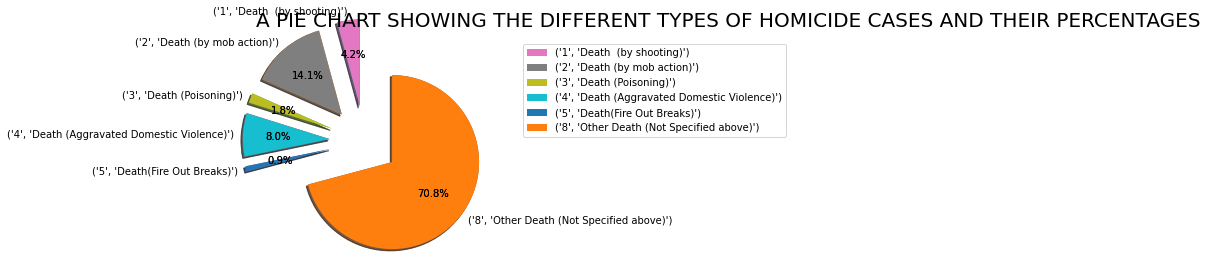

In [14]:
#Creating dataset
labels = list(homicides_reported_cases.keys())
values = homicides_reported_cases.values.tolist()

#Creating plot
fig1, ax1 = plt.subplots()
explode = (0.4, 0.4, 0.4, 0.4, 0.4, 0.4)
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
patches, texts, auto = ax1.pie(values, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%')

#add justing the position of the legend on the pie char
plt.legend(patches, labels, bbox_to_anchor=(1.5,0.5), loc="lower right",bbox_transform=plt.gcf().transFigure)

#setting the title,its position and the fontsize
plt.title('A PIE CHART SHOWING THE DIFFERENT TYPES OF HOMICIDE CASES AND THEIR PERCENTAGES', loc='left',fontsize=20)

# show plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

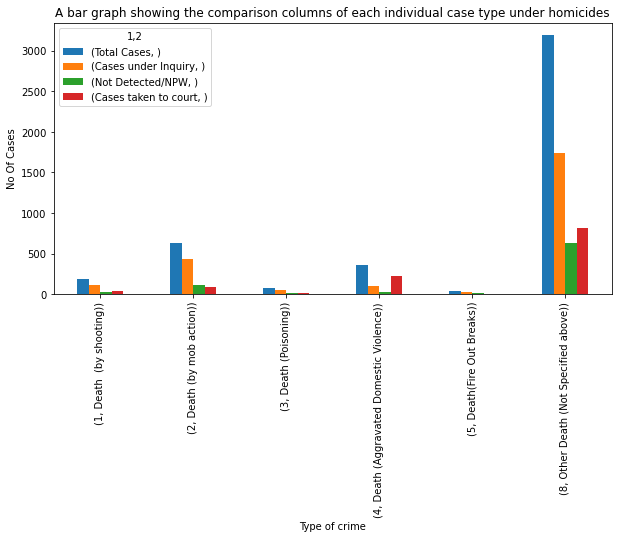

In [15]:

total_performance_stat = some_data['REPORTED CASES'].iloc[1:7].astype(int)
total_performance_stat.plot.bar(figsize=(10,5),title='A bar graph showing the comparison columns of each individual case type under homicides',xlabel='Type of crime',ylabel='No Of Cases')
plt.show

In [16]:
reported_cases_subs = some_data['REPORTED CASES'].iloc[7:8]
reported_cases_subs

,1,Total Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court
,2,,,,
S/No.,CASE/CRIME INCIDENCES,,,,
,Sub Total(Homicides),4497,2474,811,1212


<AxesSubplot:title={'center':'Total homicide cases Vs how they are handled'}, xlabel='Total cases and handling', ylabel='No of cases'>

<Figure size 432x288 with 0 Axes>

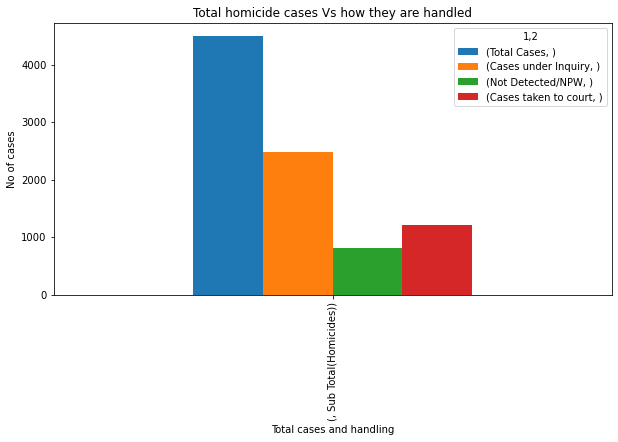

In [17]:
plt.figure()
reported_cases_subs.plot(kind='bar',title='Total homicide cases Vs how they are handled',xlabel='Total cases and handling', ylabel='No of cases', subplots=False,figsize=(10,5))